# PROJETO AGRONÉGOCIO

#1° Problema de Negócio

Precisamos **prever o resultado da temporada de colheita**, ou seja, se a cultura seria:

 **1. Saudável (viva)**

 **2. Danificada por pesticidas** ou 
 
 **3. Danificada por outros motivos.**

Os dados são baseados em safras colhidas por vários agricultores no final da temporada de colheita. 


# IMPORTAÇÃO DE BIBLIOTECAS E ARQUIVO

In [148]:
#Importação de pacotes
import warnings
import pandas as pd
df = pd.read_csv('treino.csv')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import joblib # Utilizado para salvar o modelo preditivo
from sklearn.preprocessing import LabelEncoder #Utilizada para fazer o OneHotEncoding
from sklearn.metrics import mean_squared_error,precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from imblearn import under_sampling, over_sampling #Utilizada para fazer o balanceamento de dados
from imblearn.over_sampling import SMOTE #Utilizada para fazer o balanceamento de dados
from sklearn.metrics import r2_score # Utilizado para medir a acuracia do modelo preditivo
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.options.display.float_format = '{:.2f}'.format

In [149]:
df.head(1)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0


In [150]:
df.shape

(88858, 10)

# TRADUÇÃO DA BASE DE DADOS

In [151]:
df_traduzida = df.rename(columns={'Estimated_Insects_Count':'ContagemInsetos','Crop_Type':'CategoriaCultivo','Soil_Type':'TipoSolo','Pesticide_Use_Category':'TipoPesticidas','Number_Doses_Week':'Número_Doses_Semana','Number_Weeks_Used':'Número_Semanas_Usadas','Number_Weeks_Quit':'NúmeroS_Semanas_Desistência','Season':'TemporadaColheita','Crop_Damage':'Categoria_Dano_Cultivo'})
df_traduzida.head()

,ID,ContagemInsetos,CategoriaCultivo,TipoSolo,TipoPesticidas,Número_Doses_Semana,Número_Semanas_Usadas,NúmeroS_Semanas_Desistência,TemporadaColheita,Categoria_Dano_Cultivo
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


# MANIPULAÇÃO E TRATEMENTO DE DADOS

In [152]:

df_traduzida['CategoriaCultivo'] = df_traduzida['CategoriaCultivo'].replace(0, 'transgênica')
df_traduzida['CategoriaCultivo'] = df_traduzida['CategoriaCultivo'].replace(1, 'convencional')

df_traduzida['TipoSolo'] = df_traduzida['TipoSolo'].replace(0, 'arenoso')
df_traduzida['TipoSolo'] = df_traduzida['TipoSolo'].replace(1, 'argiloso')


In [153]:
df_traduzida.head()

,ID,ContagemInsetos,CategoriaCultivo,TipoSolo,TipoPesticidas,Número_Doses_Semana,Número_Semanas_Usadas,NúmeroS_Semanas_Desistência,TemporadaColheita,Categoria_Dano_Cultivo
0,F00000001,188,convencional,arenoso,1,0,0.0,0,1,0
1,F00000003,209,convencional,arenoso,1,0,0.0,0,2,1
2,F00000004,257,convencional,arenoso,1,0,0.0,0,2,1
3,F00000005,257,convencional,argiloso,1,0,0.0,0,2,1
4,F00000006,342,convencional,arenoso,1,0,0.0,0,2,1


### VERIFICANDO VALORES NULOS E DUPLICADOS 

In [154]:
df_traduzida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           88858 non-null  object 
 1   ContagemInsetos              88858 non-null  int64  
 2   CategoriaCultivo             88858 non-null  object 
 3   TipoSolo                     88858 non-null  object 
 4   TipoPesticidas               88858 non-null  int64  
 5   Número_Doses_Semana          88858 non-null  int64  
 6   Número_Semanas_Usadas        79858 non-null  float64
 7   NúmeroS_Semanas_Desistência  88858 non-null  int64  
 8   TemporadaColheita            88858 non-null  int64  
 9   Categoria_Dano_Cultivo       88858 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 6.8+ MB


In [155]:
df_traduzida.duplicated().sum()

0

In [156]:
(df_traduzida.isnull().sum() / len(df_traduzida['TipoSolo']))*100

ID                              0.00000
ContagemInsetos                 0.00000
CategoriaCultivo                0.00000
TipoSolo                        0.00000
TipoPesticidas                  0.00000
Número_Doses_Semana             0.00000
Número_Semanas_Usadas          10.12852
NúmeroS_Semanas_Desistência     0.00000
TemporadaColheita               0.00000
Categoria_Dano_Cultivo          0.00000
dtype: float64

In [157]:
df_traduzida.describe()

,ContagemInsetos,TipoPesticidas,Número_Doses_Semana,Número_Semanas_Usadas,NúmeroS_Semanas_Desistência,TemporadaColheita,Categoria_Dano_Cultivo
count,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


### PREENCHENDO VALORES NULOS COM A MÉDIA

In [158]:
media = df_traduzida['Número_Semanas_Usadas'].mean()
df_traduzida['Número_Semanas_Usadas'] = df_traduzida['Número_Semanas_Usadas'].fillna(media)

### EXCLUINDO VARIAVEL IRRELEVANTE

In [159]:
del df_traduzida['ID']

# ANÁLISE EXPLORATÓRIA

### ESTATÍSTICA

In [160]:
df_traduzida.describe()

,ContagemInsetos,TipoPesticidas,Número_Doses_Semana,Número_Semanas_Usadas,NúmeroS_Semanas_Desistência,TemporadaColheita,Categoria_Dano_Cultivo
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.461772,15.554428,11.747567,9.900631,0.701322,0.454215
min,150.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,2.000000,20.000000,28.623970,7.000000,2.000000,0.000000
75%,1898.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


### MODA

In [161]:
from statistics import mode

mode(df_traduzida['ContagemInsetos'])

1212

In [162]:
mode(df_traduzida['TipoPesticidas'])

2

In [163]:
mode(df_traduzida['Número_Doses_Semana'])

20

In [164]:
mode(df_traduzida['Número_Semanas_Usadas'])

28.62397004683313

In [165]:
mode(df_traduzida['NúmeroS_Semanas_Desistência']) 

0

In [166]:
mode(df_traduzida['TemporadaColheita'])

2

In [167]:
mode(df_traduzida['Categoria_Dano_Cultivo'])

0

### ASSIMETRIA

In [168]:
df_traduzida['ContagemInsetos'].skew()

0.8391456380125325

In [169]:
df_traduzida['TipoPesticidas'].skew()

0.7794881288590019

In [170]:
df_traduzida['Número_Doses_Semana'].skew()

0.9628785733423003

In [171]:
df_traduzida['Número_Semanas_Usadas'].skew()

0.2580067032852669

In [172]:
df_traduzida['TemporadaColheita'].skew()

0.14522775084692485

In [173]:
df_traduzida['Categoria_Dano_Cultivo'].skew()

2.3678161799053252

### HISTOGRAMA

array([[<Axes: title={'center': 'ContagemInsetos'}>,
        <Axes: title={'center': 'TipoPesticidas'}>,
        <Axes: title={'center': 'Número_Doses_Semana'}>],
       [<Axes: title={'center': 'Número_Semanas_Usadas'}>,
        <Axes: title={'center': 'NúmeroS_Semanas_Desistência'}>,
        <Axes: title={'center': 'TemporadaColheita'}>],
       [<Axes: title={'center': 'Categoria_Dano_Cultivo'}>, <Axes: >,
        <Axes: >]], dtype=object)

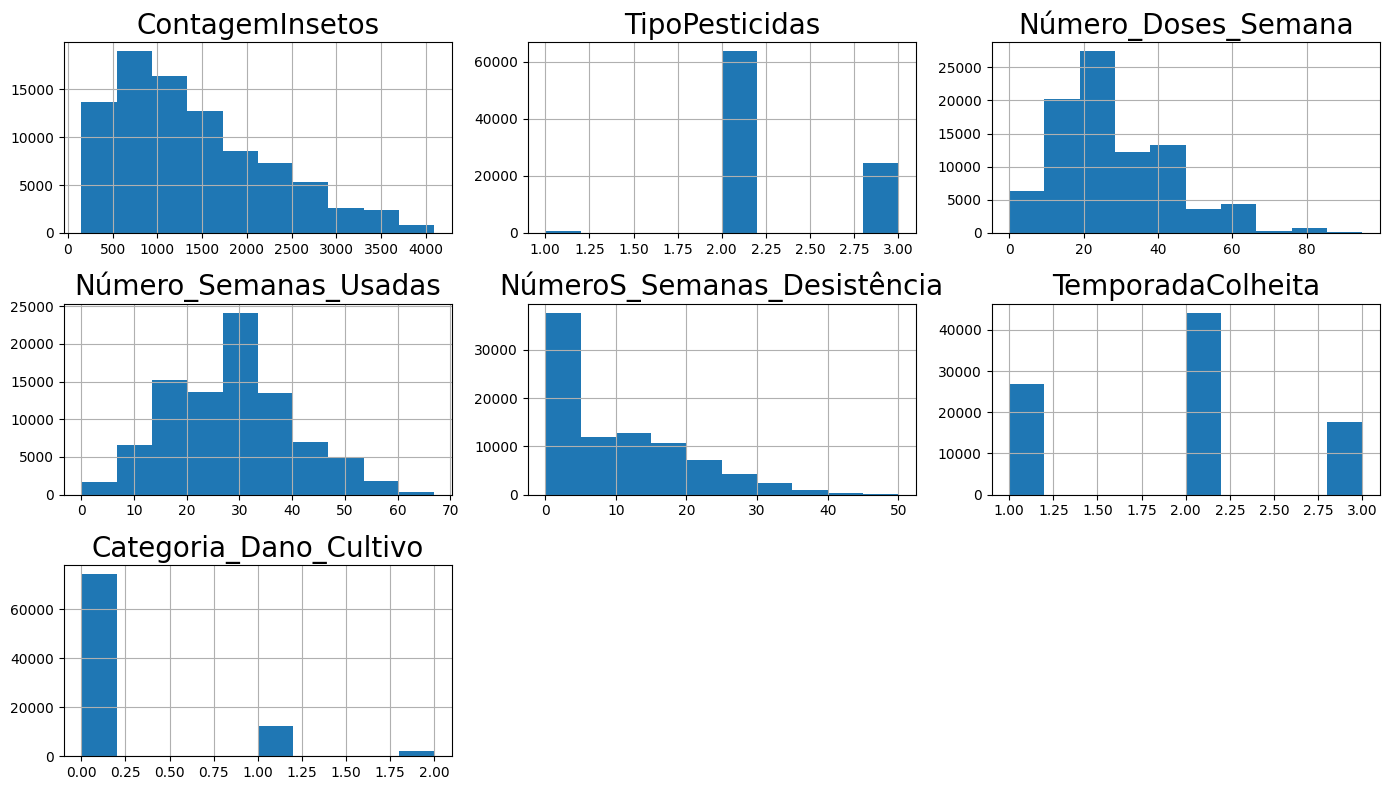

In [174]:
df_traduzida.hist()

### VERIFICANDO SE HÁ CORRELAÇÃO NAS VARIAVEIS

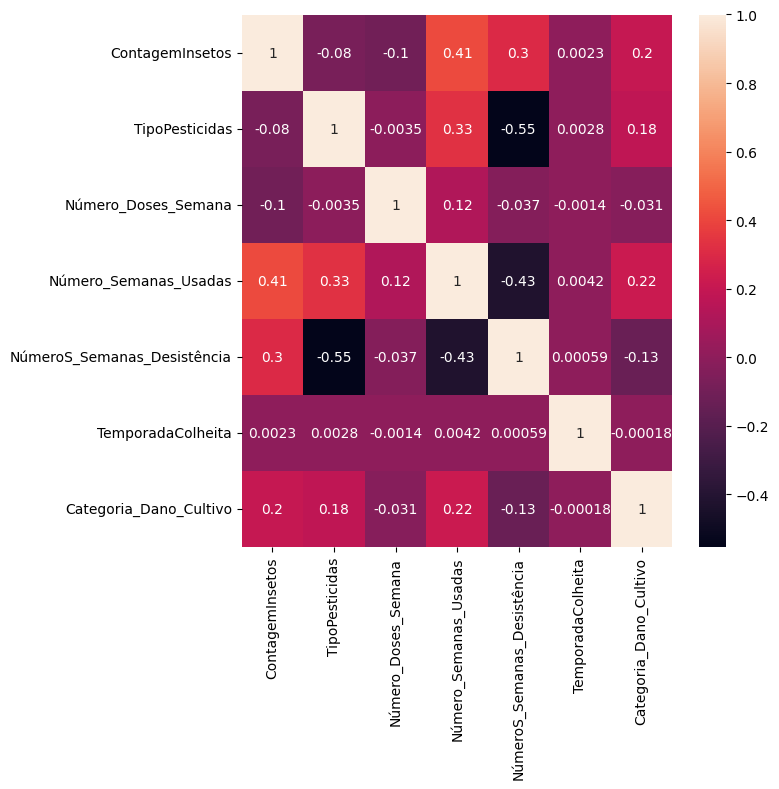

In [175]:
# Suponha que você deseja selecionar apenas colunas numéricas
df_numeric = df_traduzida.select_dtypes(include=['float64', 'int64'])

# Configurações de plot que você já especificou
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 20
plt.rcParams["figure.figsize"] = [8.00, 8.00]
plt.rcParams["figure.autolayout"] = True

# Crie o heatmap apenas para as colunas numéricas
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

### VALORES ÚNICO EM CADA VARIAVEL

In [176]:
valores_unicos = []
for i in df_traduzida.columns[0:12].tolist():
    print(i, ':', len(df_traduzida[i].astype(str).value_counts()))
    valores_unicos.append(len(df_traduzida[i].astype(str).value_counts()))

ContagemInsetos : 71
CategoriaCultivo : 2
TipoSolo : 2
TipoPesticidas : 3
Número_Doses_Semana : 20
Número_Semanas_Usadas : 65
NúmeroS_Semanas_Desistência : 51
TemporadaColheita : 3
Categoria_Dano_Cultivo : 3


## verificação de outliers 

ContagemInsetos : int64
TipoPesticidas : int64
Número_Doses_Semana : int64
Número_Semanas_Usadas : float64
NúmeroS_Semanas_Desistência : int64
TemporadaColheita : int64
Categoria_Dano_Cultivo : int64


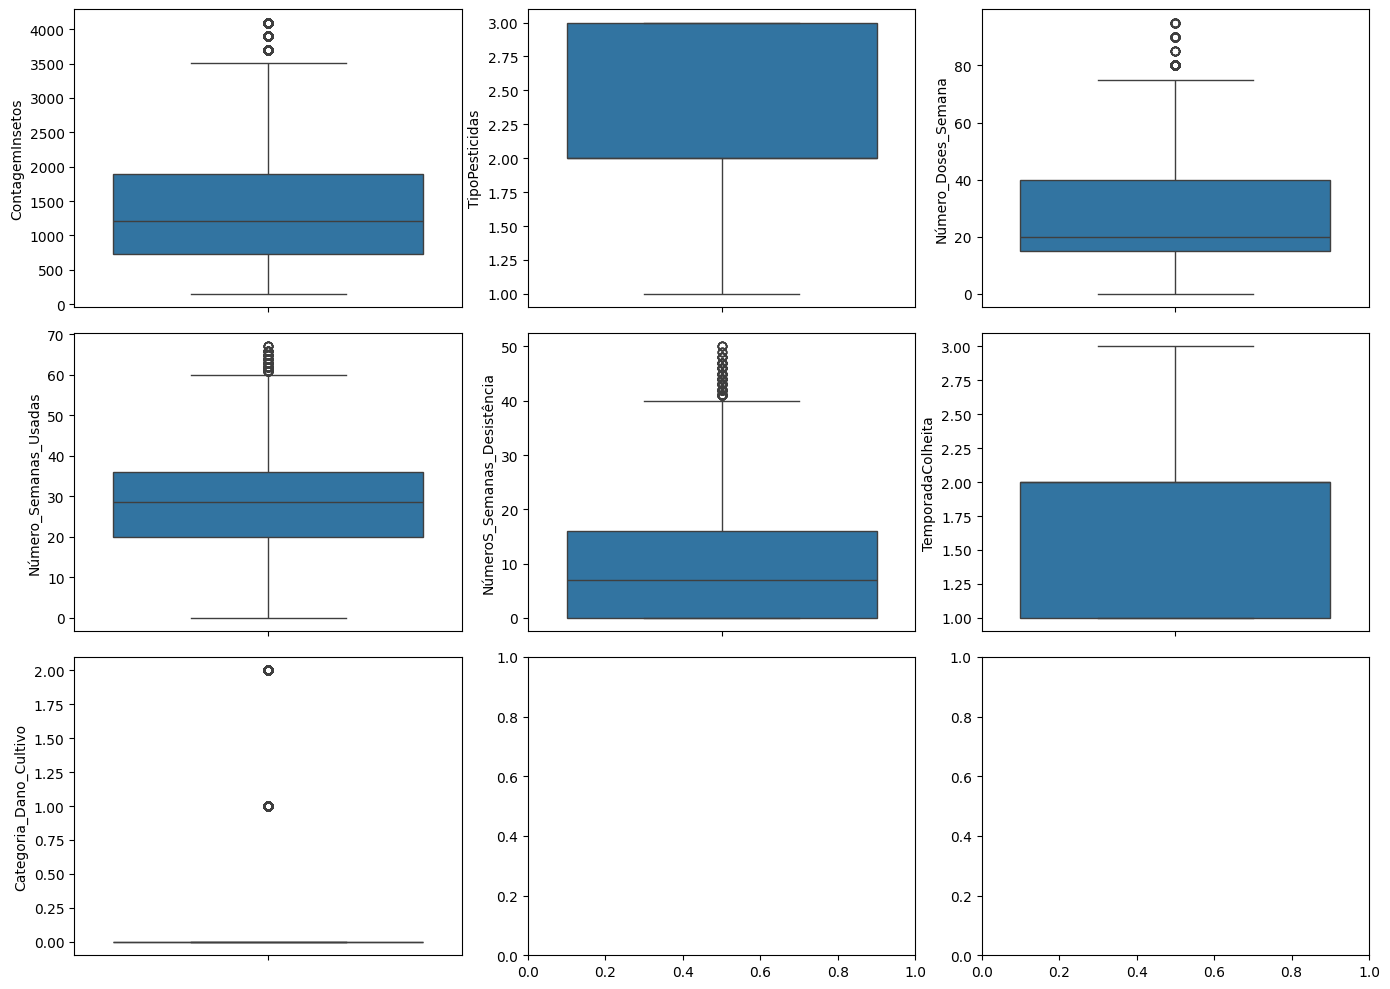

In [177]:
variaveis_numericas = []
for i in df_traduzida.columns[0:16].tolist():
        if df_traduzida.dtypes[i] == 'int64' or df_traduzida.dtypes[i] == 'float64':            
            print(i, ':' , df_traduzida.dtypes[i]) 
            variaveis_numericas.append(i)
 
    
    
    
plt.rcParams["figure.figsize"] = [14.00, 10.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(3, 3) #8 linhas e 4 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_traduzida, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0            

plt.show() 

### ANÁLISE EXPLORATÓRIA DOS DADOS COM PYGWALKER

In [178]:
#!pip install pygwalker -q
import pygwalker as pyg
pyg.walk(df_traduzida)

Box(children=(HTML(value='<div id="ifr-pyg-1" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

# ANÁLISE DE DADOS

### ALTERANDO O NOME DA VARIAVEL  PREDITORA PARA A ANÁLISE PROFUNDA

In [179]:
df_traduzida['Categoria_Dano_Cultivo'] = df_traduzida['Categoria_Dano_Cultivo'].replace(0, 'Saudável')
df_traduzida['Categoria_Dano_Cultivo'] = df_traduzida['Categoria_Dano_Cultivo'].replace(1, 'DanificadaPesticidas')
df_traduzida['Categoria_Dano_Cultivo'] = df_traduzida['Categoria_Dano_Cultivo'].replace(2, 'Danificada_Outros_Motivos')

In [180]:
df_traduzida.head()

,ContagemInsetos,CategoriaCultivo,TipoSolo,TipoPesticidas,Número_Doses_Semana,Número_Semanas_Usadas,NúmeroS_Semanas_Desistência,TemporadaColheita,Categoria_Dano_Cultivo
0,188,convencional,arenoso,1,0,0.0,0,1,Saudável
1,209,convencional,arenoso,1,0,0.0,0,2,DanificadaPesticidas
2,257,convencional,arenoso,1,0,0.0,0,2,DanificadaPesticidas
3,257,convencional,argiloso,1,0,0.0,0,2,DanificadaPesticidas
4,342,convencional,arenoso,1,0,0.0,0,2,DanificadaPesticidas


### AGRUPAMENTO DOS DADOS 

In [181]:
df_traduzida.groupby(df_traduzida['ContagemInsetos']).size()

ContagemInsetos
150      254
151      142
168      314
169       63
188      397
209      425
231       89
232      440
256      386
257      190
283      600
311      361
312      375
342      856
375     1071
410     1120
411      524
448     1925
488     1691
489      326
531     2142
577     2315
625     1694
626      799
677     2627
731     1403
732     1412
789     1859
790      942
850      483
851     2533
915     1972
916      975
984     3066
1056    3235
1132    3370
1212    3438
1296    2170
1297    1116
1385    3309
1478    3358
1575     977
1576    2036
1678    3029
1785    1990
1786     995
1898    2826
2015    1376
2016    1382
2138    1358
2139    1280
2267    2446
2401    1491
2402     742
2541     989
2542     996
2687     293
2688    1521
2840    1545
2999    1419
3164     814
3165     375
3336     309
3337     655
3515     123
3516     672
3702     617
3895     345
3896     134
4096     243
4097     113
dtype: int64

In [182]:
df_traduzida.groupby(df_traduzida['CategoriaCultivo']).size()

CategoriaCultivo
convencional    25269
transgênica     63589
dtype: int64

In [183]:
df_traduzida.groupby(df_traduzida['TipoSolo']).size()

TipoSolo
arenoso     48124
argiloso    40734
dtype: int64

In [184]:
df_traduzida.groupby(df_traduzida['TipoPesticidas']).size()

TipoPesticidas
1      837
2    63709
3    24312
dtype: int64

In [185]:
df_traduzida.groupby(df_traduzida['Número_Doses_Semana']).size() 

Número_Doses_Semana
0       837
5      5520
10    12111
15     8178
20    22589
25     4890
30    10438
35     1832
40    12298
45      936
50     3361
55      277
60     4367
65       64
70      303
75       61
80      672
85       11
90       83
95       30
dtype: int64

In [186]:
df_traduzida.groupby(df_traduzida['Número_Semanas_Usadas']).size() 

Número_Semanas_Usadas
0.00000      740
5.00000      572
6.00000      371
7.00000      418
8.00000      559
9.00000      483
10.00000    1835
11.00000     783
12.00000    1346
13.00000    1203
14.00000    1502
15.00000    2486
16.00000    1762
17.00000    1835
18.00000    2017
19.00000    1769
20.00000    3878
21.00000    1896
22.00000    2310
23.00000    2086
24.00000    2152
25.00000    3120
26.00000    2046
27.00000    1952
28.00000    2097
28.62397    9000
29.00000    1764
30.00000    3765
31.00000    1742
32.00000    2049
33.00000    1786
34.00000    1912
35.00000    2410
36.00000    1749
37.00000    1702
38.00000    1626
39.00000    1381
40.00000    2707
41.00000    1163
42.00000    1327
43.00000    1141
44.00000    1071
45.00000    1312
46.00000     907
47.00000     817
48.00000     792
49.00000     619
50.00000    1351
51.00000     447
52.00000     534
53.00000     431
54.00000     385
55.00000     439
56.00000     255
57.00000     214
58.00000     183
59.00000     105
60.00000 

In [187]:
df_traduzida.groupby(df_traduzida['NúmeroS_Semanas_Desistência']).size() 

NúmeroS_Semanas_Desistência
0     27274
1      2620
2      2743
3      2578
4      2528
5      2831
6      2584
7      2418
8      2294
9      1897
10     2893
11     2090
12     2701
13     2485
14     2610
15     2668
16     2108
17     2018
18     2030
19     1841
20     2209
21     1436
22     1414
23     1166
24     1054
25     1109
26      894
27      820
28      808
29      719
30      751
31      530
32      505
33      370
34      345
35      301
36      248
37      221
38      162
39      109
40      133
41       86
42       75
43       51
44       38
45       30
46       22
47       21
48       10
49        4
50        6
dtype: int64

In [188]:
df_traduzida.groupby(df_traduzida['TemporadaColheita']).size() 

TemporadaColheita
1    26902
2    44210
3    17746
dtype: int64

In [189]:
df_traduzida.groupby(df_traduzida['Categoria_Dano_Cultivo']).size() 

Categoria_Dano_Cultivo
DanificadaPesticidas         12307
Danificada_Outros_Motivos     2313
Saudável                     74238
dtype: int64

### PLOTANDO EM UM GRAFICO

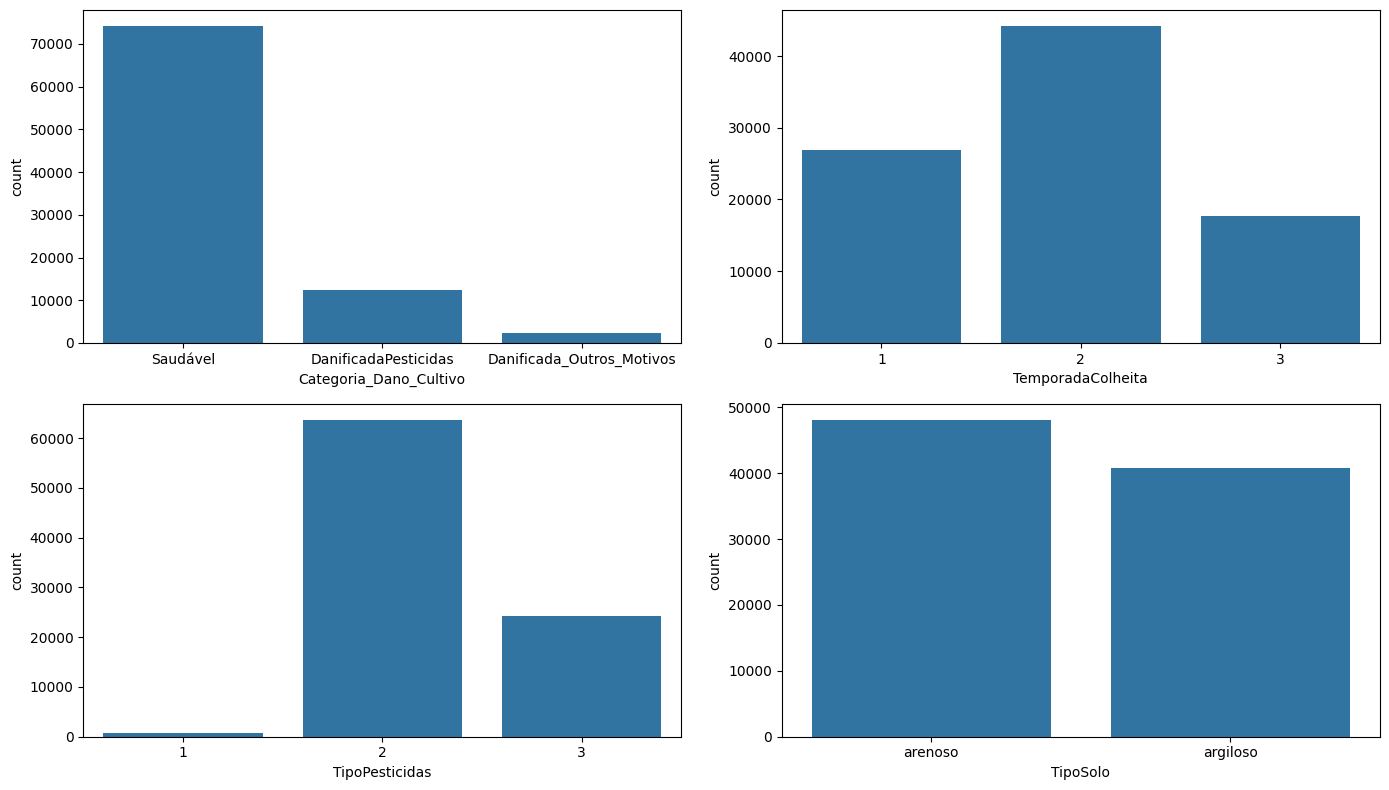

In [190]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = df_traduzida, x="Categoria_Dano_Cultivo", ax=axes[0][0])
sns.countplot(data = df_traduzida, x="TemporadaColheita", ax=axes[0][1])
sns.countplot(data = df_traduzida, x="TipoPesticidas", ax=axes[1][0])
sns.countplot(data = df_traduzida, x="TipoSolo", ax=axes[1][1])

plt.show()

## SEGMENTANDO OS DANOS DA SAFRA PARA ANÁLISE

### SAUDAVÉL

In [191]:
saudavel = df_traduzida.loc[df_traduzida['Categoria_Dano_Cultivo'] == 'Saudável']
saudavel.head()

,ContagemInsetos,CategoriaCultivo,TipoSolo,TipoPesticidas,Número_Doses_Semana,Número_Semanas_Usadas,NúmeroS_Semanas_Desistência,TemporadaColheita,Categoria_Dano_Cultivo
0,188,convencional,arenoso,1,0,0.00000,0,1,Saudável
8,731,transgênica,arenoso,1,0,0.00000,0,2,Saudável
10,1212,convencional,arenoso,1,0,28.62397,0,3,Saudável
21,3516,convencional,arenoso,1,0,0.00000,0,2,Saudável
24,150,transgênica,arenoso,3,30,26.00000,0,2,Saudável


### ANALISANDO TEMPORADA, TIPO PESTICIDAS E TIPO DO SOLO DE SAUDAVÉL 

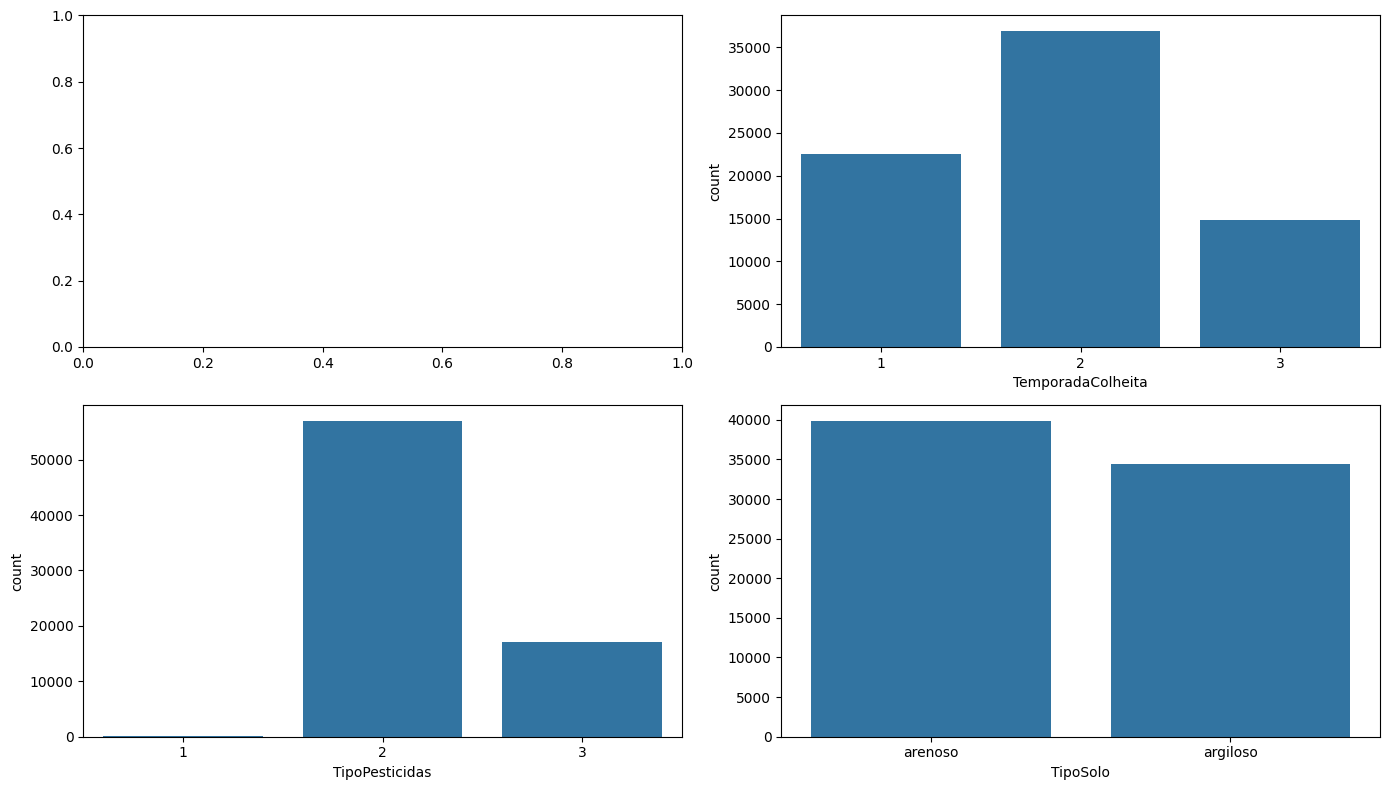

In [192]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = saudavel, x="TemporadaColheita", ax=axes[0][1])
sns.countplot(data = saudavel, x="TipoPesticidas", ax=axes[1][0])
sns.countplot(data = saudavel, x="TipoSolo", ax=axes[1][1])

plt.show()

### ANALISANDO INSERTOS, NÚMEROS DE SEMANAS, DESISTENCIA E USADAS DE TIPO DE COLHEITA

In [193]:
Quantidade = saudavel.groupby(["TemporadaColheita"])["ContagemInsetos"].count().rename('Quantidade')
insetos = saudavel.groupby(['TemporadaColheita'])['ContagemInsetos'].sum().rename('SomaInsetos')
insetos_media =saudavel.groupby(['TemporadaColheita'])['ContagemInsetos'].mean().rename('MédiaInsetos')
semanas = saudavel.groupby(['TemporadaColheita'])['Número_Doses_Semana'].sum().rename('SomaSemanasDoses')
semanas_media = saudavel.groupby(['TemporadaColheita'])['Número_Doses_Semana'].mean().rename('MédiaSemanasDoses') 
semanas_usadas = saudavel.groupby(['TemporadaColheita'])['Número_Semanas_Usadas'].sum().rename('SomaSemanasUsadas')
semanas_usadas_media = saudavel.groupby(['TemporadaColheita'])['Número_Semanas_Usadas'].mean().rename('MédiaSemanasUsadas')
semanas_desisteicias = saudavel.groupby(['TemporadaColheita'])['NúmeroS_Semanas_Desistência'].sum().rename('SomaSemanasDesistência')
semanas_desisteicias_media = saudavel.groupby(['TemporadaColheita'])['NúmeroS_Semanas_Desistência'].mean().rename('MédiaSemanasDesistência')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":Quantidade,'SomaInsetos':insetos,'MédiaInsetos':insetos_media,'SomaSemanasDoses':semanas,'MédiaSemanasDoses':semanas_media,'SomaSemanasUsadas':semanas_usadas,'MédiaSemanasUsadas':semanas_usadas_media,'SomaSemanasDesistência':semanas_desisteicias,'MédiaSemanasDesistência':semanas_desisteicias_media})

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,SomaInsetos,MédiaInsetos,SomaSemanasDoses,MédiaSemanasDoses,SomaSemanasUsadas,MédiaSemanasUsadas,SomaSemanasDesistência,MédiaSemanasDesistência
TemporadaColheita,,,,,,,,,
2,36881,48649677,1319.098642,962550,26.098804,1.014503e+06,27.507464,373636,10.130853
1,22493,29464553,1309.943227,589290,26.198817,6.164067e+05,27.404378,227459,10.112435
3,14864,19561255,1316.015541,387200,26.049516,4.090242e+05,27.517774,149499,10.057791


### ANALISANDO INSERTOS, NÚMEROS DE SEMANAS, DESISTENCIA E USADAS DE CATEGORIA CULTIVO

In [194]:
Quantidade = saudavel.groupby(["CategoriaCultivo"])["ContagemInsetos"].count().rename('Quantidade')
insetos = saudavel.groupby(['CategoriaCultivo'])['ContagemInsetos'].sum().rename('SomaInsetos')
insetos_media =saudavel.groupby(['CategoriaCultivo'])['ContagemInsetos'].mean().rename('MédiaInsetos')
semanas = saudavel.groupby(['CategoriaCultivo'])['Número_Doses_Semana'].sum().rename('SomaSemanasDoses')
semanas_media = saudavel.groupby(['CategoriaCultivo'])['Número_Doses_Semana'].mean().rename('MédiaSemanasDoses') 
semanas_usadas = saudavel.groupby(['CategoriaCultivo'])['Número_Semanas_Usadas'].sum().rename('SomaSemanasUsadas')
semanas_usadas_media = saudavel.groupby(['CategoriaCultivo'])['Número_Semanas_Usadas'].mean().rename('MédiaSemanasUsadas')
semanas_desisteicias = saudavel.groupby(['CategoriaCultivo'])['NúmeroS_Semanas_Desistência'].sum().rename('SomaSemanasDesistência')
semanas_desisteicias_media = saudavel.groupby(['CategoriaCultivo'])['NúmeroS_Semanas_Desistência'].mean().rename('MédiaSemanasDesistência')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":Quantidade,'SomaInsetos':insetos,'MédiaInsetos':insetos_media,'SomaSemanasDoses':semanas,'MédiaSemanasDoses':semanas_media,'SomaSemanasUsadas':semanas_usadas,'MédiaSemanasUsadas':semanas_usadas_media,'SomaSemanasDesistência':semanas_desisteicias,'MédiaSemanasDesistência':semanas_desisteicias_media})

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,SomaInsetos,MédiaInsetos,SomaSemanasDoses,MédiaSemanasDoses,SomaSemanasUsadas,MédiaSemanasUsadas,SomaSemanasDesistência,MédiaSemanasDesistência
CategoriaCultivo,,,,,,,,,
transgênica,52778,71563969,1355.943177,1478885,28.020861,1.459316e+06,27.650085,609672,11.551631
convencional,21460,26111516,1216.752842,460155,21.442451,5.806175e+05,27.055800,140922,6.566729


### ANALISANDO INSERTOS, NÚMEROS DE SEMANAS, DESISTENCIA E USADAS DE TIPO SOLO

In [195]:
Quantidade = saudavel.groupby(["TipoSolo"])["ContagemInsetos"].count().rename('Quantidade')
insetos = saudavel.groupby(['TipoSolo'])['ContagemInsetos'].sum().rename('SomaInsetos')
insetos_media =saudavel.groupby(['TipoSolo'])['ContagemInsetos'].mean().rename('MédiaInsetos')
semanas = saudavel.groupby(['TipoSolo'])['Número_Doses_Semana'].sum().rename('SomaSemanasDoses')
semanas_media = saudavel.groupby(['TipoSolo'])['Número_Doses_Semana'].mean().rename('MédiaSemanasDoses') 
semanas_usadas = saudavel.groupby(['TipoSolo'])['Número_Semanas_Usadas'].sum().rename('SomaSemanasUsadas')
semanas_usadas_media = saudavel.groupby(['TipoSolo'])['Número_Semanas_Usadas'].mean().rename('MédiaSemanasUsadas')
semanas_desisteicias = saudavel.groupby(['TipoSolo'])['NúmeroS_Semanas_Desistência'].sum().rename('SomaSemanasDesistência')
semanas_desisteicias_media = saudavel.groupby(['TipoSolo'])['NúmeroS_Semanas_Desistência'].mean().rename('MédiaSemanasDesistência')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":Quantidade,'SomaInsetos':insetos,'MédiaInsetos':insetos_media,'SomaSemanasDoses':semanas,'MédiaSemanasDoses':semanas_media,'SomaSemanasUsadas':semanas_usadas,'MédiaSemanasUsadas':semanas_usadas_media,'SomaSemanasDesistência':semanas_desisteicias,'MédiaSemanasDesistência':semanas_desisteicias_media})

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,SomaInsetos,MédiaInsetos,SomaSemanasDoses,MédiaSemanasDoses,SomaSemanasUsadas,MédiaSemanasUsadas,SomaSemanasDesistência,MédiaSemanasDesistência
TipoSolo,,,,,,,,,
arenoso,39841,53852763,1351.692051,992020,24.899475,1.116817e+06,28.031861,401371,10.074320
argiloso,34397,43822722,1274.027444,947020,27.532052,9.231163e+05,26.837116,349223,10.152717


### DANIFICADA POR PESTICIDAS

In [196]:
DanificadaPesticidas = df_traduzida.loc[df_traduzida['Categoria_Dano_Cultivo'] == 'DanificadaPesticidas']
DanificadaPesticidas.head(1)

,ContagemInsetos,CategoriaCultivo,TipoSolo,TipoPesticidas,Número_Doses_Semana,Número_Semanas_Usadas,NúmeroS_Semanas_Desistência,TemporadaColheita,Categoria_Dano_Cultivo
1,209,convencional,arenoso,1,0,0.0,0,2,DanificadaPesticidas


### ANALISANDO TEMPORADA, TIPO PESTICIDAS E TIPO DO SOLO DE DANIFICADO POR PESTICIDAS

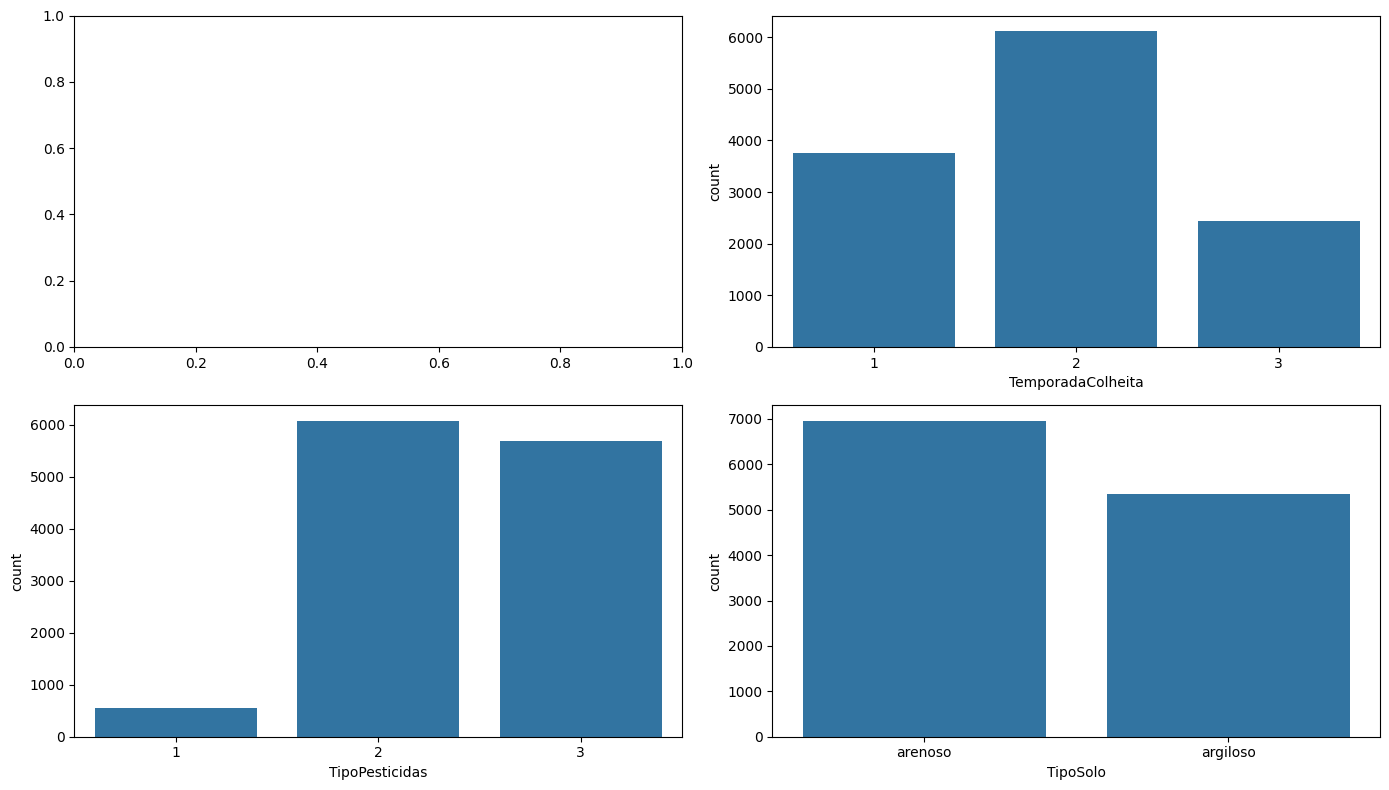

In [197]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = DanificadaPesticidas, x="TemporadaColheita", ax=axes[0][1])
sns.countplot(data = DanificadaPesticidas, x="TipoPesticidas", ax=axes[1][0])
sns.countplot(data = DanificadaPesticidas, x="TipoSolo", ax=axes[1][1])

plt.show()

### ANALISANDO INSERTOS, NÚMEROS DE SEMANAS, DESISTENCIA E USADAS DE TIPO DE COLHEITA

In [198]:
Quantidade = DanificadaPesticidas.groupby(["TemporadaColheita"])["ContagemInsetos"].count().rename('Quantidade')
insetos = DanificadaPesticidas.groupby(['TemporadaColheita'])['ContagemInsetos'].sum().rename('SomaInsetos')
insetos_media =DanificadaPesticidas.groupby(['TemporadaColheita'])['ContagemInsetos'].mean().rename('MédiaInsetos')
semanas = DanificadaPesticidas.groupby(['TemporadaColheita'])['Número_Doses_Semana'].sum().rename('SomaSemanasDoses')
semanas_media = DanificadaPesticidas.groupby(['TemporadaColheita'])['Número_Doses_Semana'].mean().rename('MédiaSemanasDoses') 
semanas_usadas = DanificadaPesticidas.groupby(['TemporadaColheita'])['Número_Semanas_Usadas'].sum().rename('SomaSemanasUsadas')
semanas_usadas_media = DanificadaPesticidas.groupby(['TemporadaColheita'])['Número_Semanas_Usadas'].mean().rename('MédiaSemanasUsadas')
semanas_desisteicias = DanificadaPesticidas.groupby(['TemporadaColheita'])['NúmeroS_Semanas_Desistência'].sum().rename('SomaSemanasDesistência')
semanas_desisteicias_media = DanificadaPesticidas.groupby(['TemporadaColheita'])['NúmeroS_Semanas_Desistência'].mean().rename('MédiaSemanasDesistência')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":Quantidade,'SomaInsetos':insetos,'MédiaInsetos':insetos_media,'SomaSemanasDoses':semanas,'MédiaSemanasDoses':semanas_media,'SomaSemanasUsadas':semanas_usadas,'MédiaSemanasUsadas':semanas_usadas_media,'SomaSemanasDesistência':semanas_desisteicias,'MédiaSemanasDesistência':semanas_desisteicias_media})

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,SomaInsetos,MédiaInsetos,SomaSemanasDoses,MédiaSemanasDoses,SomaSemanasUsadas,MédiaSemanasUsadas,SomaSemanasDesistência,MédiaSemanasDesistência
TemporadaColheita,,,,,,,,,
2,6115,11176458,1827.711856,147995,24.201962,208208.716860,34.048850,45565,7.451349
1,3748,6917594,1845.676094,90020,24.018143,126618.501127,33.782951,28580,7.625400
3,2444,4539828,1857.540098,59520,24.353519,83423.496632,34.134000,19766,8.087561


### ANALISANDO INSERTOS, NÚMEROS DE SEMANAS, DESISTENCIA E USADAS DE CATEGORIA CULTIVO

In [199]:
Quantidade = DanificadaPesticidas.groupby(["CategoriaCultivo"])["ContagemInsetos"].count().rename('Quantidade')
insetos = DanificadaPesticidas.groupby(['CategoriaCultivo'])['ContagemInsetos'].sum().rename('SomaInsetos')
insetos_media =DanificadaPesticidas.groupby(['CategoriaCultivo'])['ContagemInsetos'].mean().rename('MédiaInsetos')
semanas = DanificadaPesticidas.groupby(['CategoriaCultivo'])['Número_Doses_Semana'].sum().rename('SomaSemanasDoses')
semanas_media = DanificadaPesticidas.groupby(['CategoriaCultivo'])['Número_Doses_Semana'].mean().rename('MédiaSemanasDoses') 
semanas_usadas = DanificadaPesticidas.groupby(['CategoriaCultivo'])['Número_Semanas_Usadas'].sum().rename('SomaSemanasUsadas')
semanas_usadas_media = DanificadaPesticidas.groupby(['CategoriaCultivo'])['Número_Semanas_Usadas'].mean().rename('MédiaSemanasUsadas')
semanas_desisteicias = DanificadaPesticidas.groupby(['CategoriaCultivo'])['NúmeroS_Semanas_Desistência'].sum().rename('SomaSemanasDesistência')
semanas_desisteicias_media = DanificadaPesticidas.groupby(['CategoriaCultivo'])['NúmeroS_Semanas_Desistência'].mean().rename('MédiaSemanasDesistência')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":Quantidade,'SomaInsetos':insetos,'MédiaInsetos':insetos_media,'SomaSemanasDoses':semanas,'MédiaSemanasDoses':semanas_media,'SomaSemanasUsadas':semanas_usadas,'MédiaSemanasUsadas':semanas_usadas_media,'SomaSemanasDesistência':semanas_desisteicias,'MédiaSemanasDesistência':semanas_desisteicias_media})

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,SomaInsetos,MédiaInsetos,SomaSemanasDoses,MédiaSemanasDoses,SomaSemanasUsadas,MédiaSemanasUsadas,SomaSemanasDesistência,MédiaSemanasDesistência
CategoriaCultivo,,,,,,,,,
transgênica,9204,17511506,1902.597349,239235,25.992503,317937.779784,34.543435,85715,9.312799
convencional,3103,5122374,1650.781180,58300,18.788269,100312.934834,32.327726,8196,2.641315


### ANALISANDO INSERTOS, NÚMEROS DE SEMANAS, DESISTENCIA E USADAS DE TIPO SOLO

In [200]:
Quantidade = DanificadaPesticidas.groupby(["TipoSolo"])["ContagemInsetos"].count().rename('Quantidade')
insetos = DanificadaPesticidas.groupby(['TipoSolo'])['ContagemInsetos'].sum().rename('SomaInsetos')
insetos_media =DanificadaPesticidas.groupby(['TipoSolo'])['ContagemInsetos'].mean().rename('MédiaInsetos')
semanas = DanificadaPesticidas.groupby(['TipoSolo'])['Número_Doses_Semana'].sum().rename('SomaSemanasDoses')
semanas_media = DanificadaPesticidas.groupby(['TipoSolo'])['Número_Doses_Semana'].mean().rename('MédiaSemanasDoses') 
semanas_usadas = DanificadaPesticidas.groupby(['TipoSolo'])['Número_Semanas_Usadas'].sum().rename('SomaSemanasUsadas')
semanas_usadas_media = DanificadaPesticidas.groupby(['TipoSolo'])['Número_Semanas_Usadas'].mean().rename('MédiaSemanasUsadas')
semanas_desisteicias = DanificadaPesticidas.groupby(['TipoSolo'])['NúmeroS_Semanas_Desistência'].sum().rename('SomaSemanasDesistência')
semanas_desisteicias_media = DanificadaPesticidas.groupby(['TipoSolo'])['NúmeroS_Semanas_Desistência'].mean().rename('MédiaSemanasDesistência')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":Quantidade,'SomaInsetos':insetos,'MédiaInsetos':insetos_media,'SomaSemanasDoses':semanas,'MédiaSemanasDoses':semanas_media,'SomaSemanasUsadas':semanas_usadas,'MédiaSemanasUsadas':semanas_usadas_media,'SomaSemanasDesistência':semanas_desisteicias,'MédiaSemanasDesistência':semanas_desisteicias_media})

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,SomaInsetos,MédiaInsetos,SomaSemanasDoses,MédiaSemanasDoses,SomaSemanasUsadas,MédiaSemanasUsadas,SomaSemanasDesistência,MédiaSemanasDesistência
TipoSolo,,,,,,,,,
arenoso,6953,13197627,1898.119804,162980,23.440242,244317.051692,35.138365,51899,7.464260
argiloso,5354,9436253,1762.467874,134555,25.131677,173933.662927,32.486676,42012,7.846843


### DANIFICADA POR OUTROS MOTIVOS

In [201]:
Danificada_Outros_Motivos = df_traduzida.loc[df_traduzida['Categoria_Dano_Cultivo'] == 'Danificada_Outros_Motivos']
Danificada_Outros_Motivos.head(1)

,ContagemInsetos,CategoriaCultivo,TipoSolo,TipoPesticidas,Número_Doses_Semana,Número_Semanas_Usadas,NúmeroS_Semanas_Desistência,TemporadaColheita,Categoria_Dano_Cultivo
7,577,convencional,arenoso,1,0,0.0,0,1,Danificada_Outros_Motivos


### ANALISANDO TEMPORADA, TIPO PESTICIDAS E TIPO DO SOLO DE DANIFICADA POR OUTROS MOTIVOS 

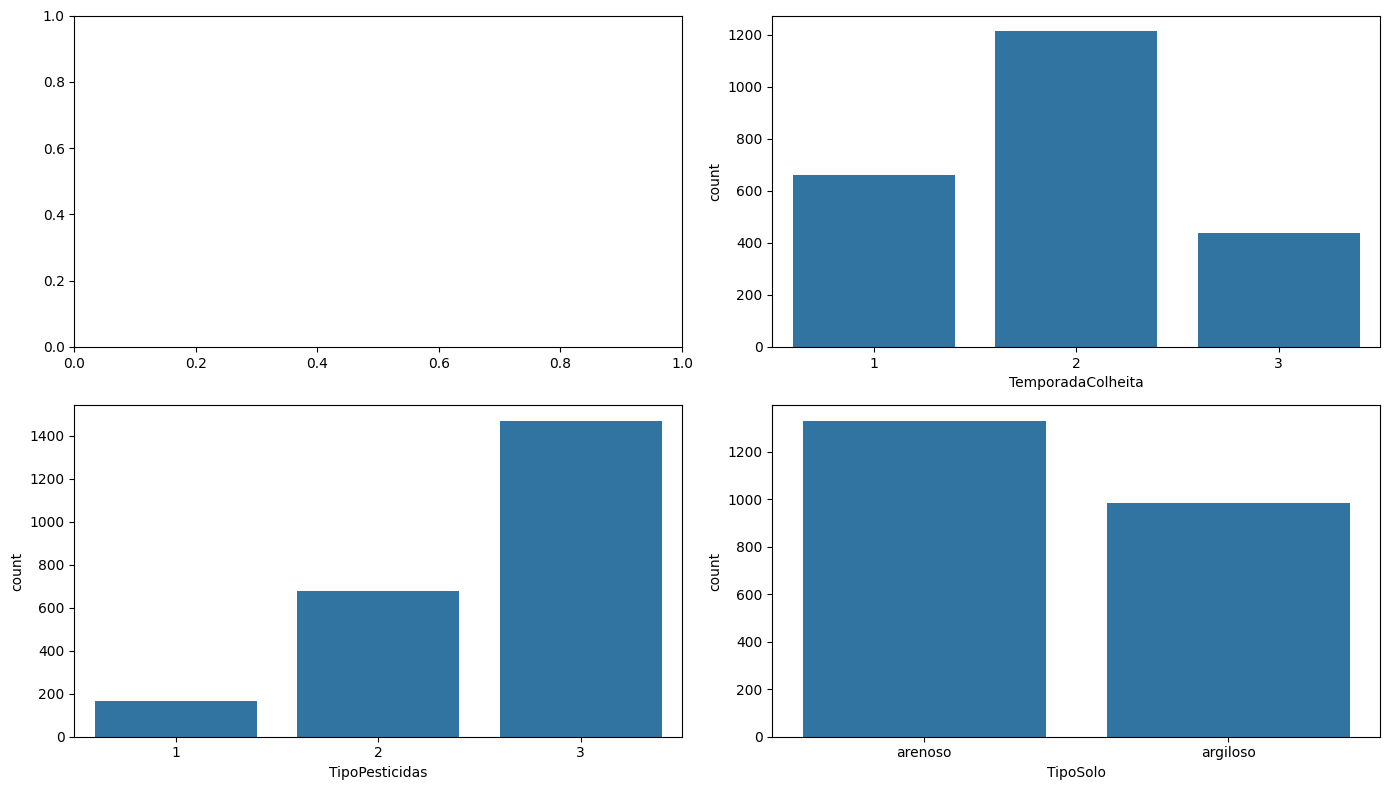

In [202]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = Danificada_Outros_Motivos, x="TemporadaColheita", ax=axes[0][1])
sns.countplot(data = Danificada_Outros_Motivos, x="TipoPesticidas", ax=axes[1][0])
sns.countplot(data = Danificada_Outros_Motivos, x="TipoSolo", ax=axes[1][1])

plt.show()

### ANALISANDO INSERTOS, NÚMEROS DE SEMANAS, DESISTENCIA E USADAS DE TIPO DE COLHEITA

In [203]:
Quantidade = Danificada_Outros_Motivos.groupby(["TemporadaColheita"])["ContagemInsetos"].count().rename('Quantidade')
insetos = Danificada_Outros_Motivos.groupby(['TemporadaColheita'])['ContagemInsetos'].sum().rename('SomaInsetos')
insetos_media =Danificada_Outros_Motivos.groupby(['TemporadaColheita'])['ContagemInsetos'].mean().rename('MédiaInsetos')
semanas = Danificada_Outros_Motivos.groupby(['TemporadaColheita'])['Número_Doses_Semana'].sum().rename('SomaSemanasDoses')
semanas_media = Danificada_Outros_Motivos.groupby(['TemporadaColheita'])['Número_Doses_Semana'].mean().rename('MédiaSemanasDoses') 
semanas_usadas = Danificada_Outros_Motivos.groupby(['TemporadaColheita'])['Número_Semanas_Usadas'].sum().rename('SomaSemanasUsadas')
semanas_usadas_media = Danificada_Outros_Motivos.groupby(['TemporadaColheita'])['Número_Semanas_Usadas'].mean().rename('MédiaSemanasUsadas')
semanas_desisteicias = Danificada_Outros_Motivos.groupby(['TemporadaColheita'])['NúmeroS_Semanas_Desistência'].sum().rename('SomaSemanasDesistência')
semanas_desisteicias_media = Danificada_Outros_Motivos.groupby(['TemporadaColheita'])['NúmeroS_Semanas_Desistência'].mean().rename('MédiaSemanasDesistência')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":Quantidade,'SomaInsetos':insetos,'MédiaInsetos':insetos_media,'SomaSemanasDoses':semanas,'MédiaSemanasDoses':semanas_media,'SomaSemanasUsadas':semanas_usadas,'MédiaSemanasUsadas':semanas_usadas_media,'SomaSemanasDesistência':semanas_desisteicias,'MédiaSemanasDesistência':semanas_desisteicias_media})

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,SomaInsetos,MédiaInsetos,SomaSemanasDoses,MédiaSemanasDoses,SomaSemanasUsadas,MédiaSemanasUsadas,SomaSemanasDesistência,MédiaSemanasDesistência
TemporadaColheita,,,,,,,,,
2,1214,2118628,1745.163097,31930,26.301483,44977.107866,37.048689,3823,3.149094
1,661,1145919,1733.614221,16960,25.658094,24372.293634,36.871851,2242,3.391831
3,438,739515,1688.390411,11510,26.278539,15934.958802,36.381184,1577,3.600457


### ANALISANDO INSERTOS, NÚMEROS DE SEMANAS, DESISTENCIA E USADAS DE CATEGORIA CULTIVO

In [204]:
Quantidade = Danificada_Outros_Motivos.groupby(["CategoriaCultivo"])["ContagemInsetos"].count().rename('Quantidade')
insetos = Danificada_Outros_Motivos.groupby(['CategoriaCultivo'])['ContagemInsetos'].sum().rename('SomaInsetos')
insetos_media =Danificada_Outros_Motivos.groupby(['CategoriaCultivo'])['ContagemInsetos'].mean().rename('MédiaInsetos')
semanas = Danificada_Outros_Motivos.groupby(['CategoriaCultivo'])['Número_Doses_Semana'].sum().rename('SomaSemanasDoses')
semanas_media = Danificada_Outros_Motivos.groupby(['CategoriaCultivo'])['Número_Doses_Semana'].mean().rename('MédiaSemanasDoses') 
semanas_usadas = Danificada_Outros_Motivos.groupby(['CategoriaCultivo'])['Número_Semanas_Usadas'].sum().rename('SomaSemanasUsadas')
semanas_usadas_media = Danificada_Outros_Motivos.groupby(['CategoriaCultivo'])['Número_Semanas_Usadas'].mean().rename('MédiaSemanasUsadas')
semanas_desisteicias = Danificada_Outros_Motivos.groupby(['CategoriaCultivo'])['NúmeroS_Semanas_Desistência'].sum().rename('SomaSemanasDesistência')
semanas_desisteicias_media = Danificada_Outros_Motivos.groupby(['CategoriaCultivo'])['NúmeroS_Semanas_Desistência'].mean().rename('MédiaSemanasDesistência')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":Quantidade,'SomaInsetos':insetos,'MédiaInsetos':insetos_media,'SomaSemanasDoses':semanas,'MédiaSemanasDoses':semanas_media,'SomaSemanasUsadas':semanas_usadas,'MédiaSemanasUsadas':semanas_usadas_media,'SomaSemanasDesistência':semanas_desisteicias,'MédiaSemanasDesistência':semanas_desisteicias_media})

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,SomaInsetos,MédiaInsetos,SomaSemanasDoses,MédiaSemanasDoses,SomaSemanasUsadas,MédiaSemanasUsadas,SomaSemanasDesistência,MédiaSemanasDesistência
CategoriaCultivo,,,,,,,,,
transgênica,1607,2909573,1810.561917,45465,28.291848,62542.579028,38.918842,7057,4.391413
convencional,706,1094489,1550.267705,14935,21.154391,22741.781274,32.212155,585,0.828612


### ANALISANDO INSERTOS, NÚMEROS DE SEMANAS, DESISTENCIA E USADAS DE TIPO SOLO

In [205]:
Quantidade = Danificada_Outros_Motivos.groupby(["TipoSolo"])["ContagemInsetos"].count().rename('Quantidade')
insetos = Danificada_Outros_Motivos.groupby(['TipoSolo'])['ContagemInsetos'].sum().rename('SomaInsetos')
insetos_media =Danificada_Outros_Motivos.groupby(['TipoSolo'])['ContagemInsetos'].mean().rename('MédiaInsetos')
semanas = Danificada_Outros_Motivos.groupby(['TipoSolo'])['Número_Doses_Semana'].sum().rename('SomaSemanasDoses')
semanas_media = Danificada_Outros_Motivos.groupby(['TipoSolo'])['Número_Doses_Semana'].mean().rename('MédiaSemanasDoses') 
semanas_usadas = Danificada_Outros_Motivos.groupby(['TipoSolo'])['Número_Semanas_Usadas'].sum().rename('SomaSemanasUsadas')
semanas_usadas_media = Danificada_Outros_Motivos.groupby(['TipoSolo'])['Número_Semanas_Usadas'].mean().rename('MédiaSemanasUsadas')
semanas_desisteicias = Danificada_Outros_Motivos.groupby(['TipoSolo'])['NúmeroS_Semanas_Desistência'].sum().rename('SomaSemanasDesistência')
semanas_desisteicias_media = Danificada_Outros_Motivos.groupby(['TipoSolo'])['NúmeroS_Semanas_Desistência'].mean().rename('MédiaSemanasDesistência')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Quantidade":Quantidade,'SomaInsetos':insetos,'MédiaInsetos':insetos_media,'SomaSemanasDoses':semanas,'MédiaSemanasDoses':semanas_media,'SomaSemanasUsadas':semanas_usadas,'MédiaSemanasUsadas':semanas_usadas_media,'SomaSemanasDesistência':semanas_desisteicias,'MédiaSemanasDesistência':semanas_desisteicias_media})

dados_usuarios.sort_values("Quantidade", ascending=False).head(5)

,Quantidade,SomaInsetos,MédiaInsetos,SomaSemanasDoses,MédiaSemanasDoses,SomaSemanasUsadas,MédiaSemanasUsadas,SomaSemanasDesistência,MédiaSemanasDesistência
TipoSolo,,,,,,,,,
arenoso,1330,2394901,1800.677444,34290,25.781955,50912.099627,38.279774,4134,3.108271
argiloso,983,1609161,1636.989827,26110,26.561546,34372.260675,34.966694,3508,3.568667


# MACHINE LEARNING

## PRÉ-PROCESSAMENTO

In [206]:
df_traduzida.head()

,ContagemInsetos,CategoriaCultivo,TipoSolo,TipoPesticidas,Número_Doses_Semana,Número_Semanas_Usadas,NúmeroS_Semanas_Desistência,TemporadaColheita,Categoria_Dano_Cultivo
0,188,convencional,arenoso,1,0,0.0,0,1,Saudável
1,209,convencional,arenoso,1,0,0.0,0,2,DanificadaPesticidas
2,257,convencional,arenoso,1,0,0.0,0,2,DanificadaPesticidas
3,257,convencional,argiloso,1,0,0.0,0,2,DanificadaPesticidas
4,342,convencional,arenoso,1,0,0.0,0,2,DanificadaPesticidas


## ENCODER

In [207]:
# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
df_traduzida['CategoriaCultivo'] = lb.fit_transform(df_traduzida['CategoriaCultivo'])
df_traduzida['TipoSolo'] = lb.fit_transform(df_traduzida['TipoSolo'])
df_traduzida['Categoria_Dano_Cultivo'] = lb.fit_transform(df_traduzida['Categoria_Dano_Cultivo'])
# Remove valores missing eventualmente gerados
df_traduzida.dropna(inplace = True)

### Separa X e y

In [208]:

X = df_traduzida.iloc[:, :-1]
y = df_traduzida.iloc[:, -1]

In [209]:

X.head(1)

,ContagemInsetos,CategoriaCultivo,TipoSolo,TipoPesticidas,Número_Doses_Semana,Número_Semanas_Usadas,NúmeroS_Semanas_Desistência,TemporadaColheita
0,188,0,0,1,0,0.0,0,1


In [210]:
y.head()

0    2
1    0
2    0
3    0
4    0
Name: Categoria_Dano_Cultivo, dtype: int32

Contagem de classes antes do balanceamento:
Categoria_Dano_Cultivo
2    74238
0    12307
1     2313
Name: count, dtype: int64

Contagem de classes após o balanceamento:
Categoria_Dano_Cultivo
2    74238
0    74238
1    74238
Name: count, dtype: int64


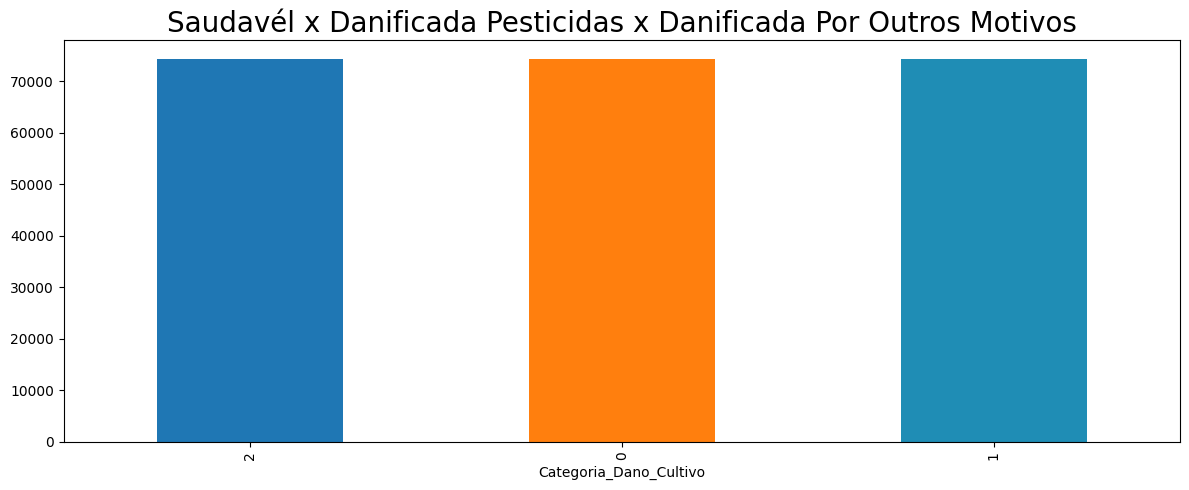

In [216]:
# Seed para reproduzir o mesmo resultado
seed = 100
# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state=seed)

# Verifica a contagem de classes antes do balanceamento
print("Contagem de classes antes do balanceamento:")
print(y.value_counts())

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

# Verifica a contagem de classes após o balanceamento
print("\nContagem de classes após o balanceamento:")
print(pd.Series(y_res).value_counts())


# Visualizando o balanceamento da variável TARGET
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
y_res.value_counts().plot(kind='bar', title='Saudavél x Danificada Pesticidas x Danificada Por Outros Motivos',color = ['#1F77B4', '#FF7F0E','#1f8db5']);

In [217]:
X.shape

(88858, 8)

In [218]:
X_res.shape

(222714, 8)

In [219]:
y.shape

(88858,)

In [220]:
y_res.shape

(222714,)

### VARIAVEIS MAIS IMPORTANTES

In [221]:
from sklearn.ensemble import ExtraTreesClassifier

# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier()
modelo.fit(X, y)

ExtraTreesClassifier()

In [222]:
# Print dos Resultados
print(df_traduzida.columns[0:12])
print(modelo.feature_importances_)

Index(['ContagemInsetos', 'CategoriaCultivo', 'TipoSolo', 'TipoPesticidas',
       'Número_Doses_Semana', 'Número_Semanas_Usadas',
       'NúmeroS_Semanas_Desistência', 'TemporadaColheita',
       'Categoria_Dano_Cultivo'],
      dtype='object')
[0.30767238 0.00900034 0.00858112 0.05752603 0.15761256 0.29502539
 0.13376351 0.03081866]


In [223]:
# SEPRANDO AS VARIAVEIS PARA TREINAMENTO

# Train Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.3, random_state=42)

In [224]:
from xgboost import XGBClassifier

# Criando o modelo
modelo = XGBClassifier()

# Treinando o modelo
modelo.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [226]:
y_pred = modelo.predict(X_test)
previsoes = [round(value) for value in y_pred]

In [230]:
#Using confusion matrix to find the accuracy
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)

accuracy = cm.diagonal().sum()/cm.sum()

print("\n---------------------------\n")
print("Accuracy of Predictions = ",accuracy)

print("\n---------------------------\n")
print(classification_report(y_test, y_pred))
print(cm)


---------------------------

Accuracy of Predictions =  0.7442490458729327

---------------------------

              precision    recall  f1-score   support

           0       0.69      0.57      0.62     22242
           1       0.74      0.81      0.77     22541
           2       0.79      0.86      0.82     22032

    accuracy                           0.74     66815
   macro avg       0.74      0.74      0.74     66815
weighted avg       0.74      0.74      0.74     66815

[[12619  5652  3971]
 [ 3341 18210   990]
 [ 2405   729 18898]]
